In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_sales = pd.read_csv('SalesTransactionv4a-230918-164139 (1).csv')
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


# Data Cleansing

In [7]:
# 1. Ubah kolom Date menjadi datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# 2. Buang transaksi Quantity negatif dan TransactionNo diawali 'C'
df_sales = df_sales[(df_sales['Quantity'] > 0) & (df_sales['TransactionNo'].str[0] != 'C')]

# 3. Hapus duplikat
df_sales = df_sales.drop_duplicates()

df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom


In [9]:
df_sales.describe()

,Date,Price,Quantity,CustomerNo
count,522602,522602.000000,522602.000000,522601.000000
mean,2019-07-04 03:24:38.308923392,12.637155,10.667487,15226.311767
min,2018-12-01 00:00:00,5.130000,1.000000,12004.000000
25%,2019-03-28 00:00:00,10.990000,1.000000,13804.000000
50%,2019-07-20 00:00:00,11.940000,4.000000,15152.000000
75%,2019-10-19 00:00:00,14.090000,12.000000,16729.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000
std,NaN,7.965967,157.542269,1716.555479


# Top Contributing products

## Total Revenue

In [11]:
# Add column total revenue
df_sales['Total_Revenue']=df_sales['Quantity']*df_sales['Price'] 
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total_Revenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64
...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45


## Volume Segmentasi

In [13]:
# hitung kategori produk paling populer berdasarkan jumlah order 
df_popular_product = df_sales.groupby('ProductName').agg(popular_product=('ProductName', 'count'))
df_popular_product.sort_values('popular_product', ascending=False)

,popular_product
ProductName,
Cream Hanging Heart T-Light Holder,2324
Jumbo Bag Red Retrospot,2112
Regency Cakestand 3 Tier,2010
Party Bunting,1701
Lunch Bag Red Retrospot,1584
...,...
Pink Painted Kashmiri Chair,1
Dolphin Windmill,1
Set Of 3 Pink Flying Ducks,1


In [229]:
# 20% produk dengan volume transaksi transaksi tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
df_popular_product['volume_segment'] = pd.qcut(
    df_popular_product['popular_product'],
    q=[0, 0.2, 0.8, 1.0], 
    labels=['Low', 'Normal', 'Popular'])
df_popular_product.sort_values('popular_product', ascending=False)

,popular_product,volume_segment
ProductName,,
Cream Hanging Heart T-Light Holder,2324,Popular
Jumbo Bag Red Retrospot,2112,Popular
Regency Cakestand 3 Tier,2010,Popular
Party Bunting,1701,Popular
Lunch Bag Red Retrospot,1584,Popular
...,...,...
Pink Painted Kashmiri Chair,1,Low
Dolphin Windmill,1,Low
Set Of 3 Pink Flying Ducks,1,Low


Produk dengan penjualan tertinggi adalah:
1. Cream Hanging Heart T-Light Holder — 2.324 transaksi
2. Jumbo Bag Red Retrospot — 2.112 transaksi
3. Regency Cakestand 3 Tier — 2.010 transaksi

Produk-produk terlaris didominasi oleh barang dekoratif dan perlengkapan rumah tangga.
Produk dengan tema Retrospot muncul beberapa kali, menandakan brand/theme ini populer.

## Revenue Segmentasi

In [25]:
# hitung revenue penjualan produk
df_revenue_product = df_sales.groupby('ProductName').agg(revenue_product=('Total_Revenue', 'sum'))
df_revenue_product.sort_values('revenue_product', ascending=False)

,revenue_product
ProductName,
Paper Craft Little Birdie,1002718.10
Medium Ceramic Top Storage Jar,881990.18
Popcorn Holder,587222.66
World War 2 Gliders Asstd Designs,568722.59
Cream Hanging Heart T-Light Holder,484354.72
...,...
Funky Monkey Mug,11.53
Pink Crystal Guitar Phone Charm,11.12
Hen House W Chick In Nest,10.68


In [27]:
# 20% produk dengan total revenue tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
df_revenue_product['revenue_segment'] = pd.qcut(
    df_revenue_product['revenue_product'],
    q=[0, 0.2, 0.8, 1.0], 
    labels=['Low', 'Normal', 'Popular'])
df_revenue_product.sort_values('revenue_product', ascending=False)

,revenue_product,revenue_segment
ProductName,,
Paper Craft Little Birdie,1002718.10,Popular
Medium Ceramic Top Storage Jar,881990.18,Popular
Popcorn Holder,587222.66,Popular
World War 2 Gliders Asstd Designs,568722.59,Popular
Cream Hanging Heart T-Light Holder,484354.72,Popular
...,...,...
Funky Monkey Mug,11.53,Low
Pink Crystal Guitar Phone Charm,11.12,Low
Hen House W Chick In Nest,10.68,Low


Paper Craft Little Birdie adalah penyumbang revenue terbesar, hampir 20% dari total pendapatan top 10.
Meskipun Cream Hanging Heart T-Light Holder paling sering terjual (lihat tabel sebelumnya), dari sisi revenue, posisinya hanya ke-6. Ini mengindikasikan harga satuan lebih rendah.
Produk seperti Rabbit Night Light dan Ceramic Storage Jar mungkin tidak memiliki volume transaksi tinggi, namun harga jual yang lebih tinggi, sehingga kontribusi pendapatan besar.
Produk bertema Retrospot dan dekoratif tetap konsisten di daftar produk dengan revenue besar, menandakan permintaan kuat di segmen ini.

## Final Segmentasi

In [133]:
# Gabungkan kedua segmentasi berdasarkan index
Volume = df_popular_product[['volume_segment']]
Revenue = df_revenue_product[['revenue_segment']]

df_final_segment = pd.concat([Volume, Revenue], axis=1)
df_final_segment

,volume_segment,revenue_segment
ProductName,,
10 Colour Spaceboy Pen,Popular,Popular
12 Coloured Party Balloons,Normal,Popular
12 Daisy Pegs In Wood Box,Normal,Normal
12 Egg House Painted Wood,Normal,Normal
12 Hanging Eggs Hand Painted,Low,Low
...,...,...
Zinc T-Light Holder Stars Small,Popular,Popular
Zinc Top 2 Door Wooden Shelf,Low,Low
Zinc Willie Winkie Candle Stick,Popular,Popular


Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang disebutkan masuk ke kategori "Normal"

In [135]:
def final_segment(row):
    if row['volume_segment'] == 'Popular' and row['revenue_segment'] == 'Popular':
        return 'Super Popular'
    elif ('Popular' in row.values) and ('Normal' in row.values):
        return 'Popular'
    elif row['volume_segment'] == 'Low' and row['revenue_segment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

# Tambahkan kolom final_segment
df_final_segment['final_segment'] = df_final_segment.apply(final_segment, axis=1)

# Lihat hasilnya
df_final_segment.head()

,volume_segment,revenue_segment,final_segment
ProductName,,,
10 Colour Spaceboy Pen,Popular,Popular,Super Popular
12 Coloured Party Balloons,Normal,Popular,Popular
12 Daisy Pegs In Wood Box,Normal,Normal,Normal
12 Egg House Painted Wood,Normal,Normal,Normal
12 Hanging Eggs Hand Painted,Low,Low,Low


In [139]:
# ringkasan statistik berdasarkan volume segment
df_final_segment.groupby('final_segment').agg({'final_segment':['count']})

,final_segment
,count
final_segment,
Low,642
Normal,2194
Popular,335
Super Popular,582


C:\Users\sahar\AppData\Local\Temp\ipykernel_13396\783372406.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_segment, x='Final Segment', y='Jumlah Produk', palette='Set2')


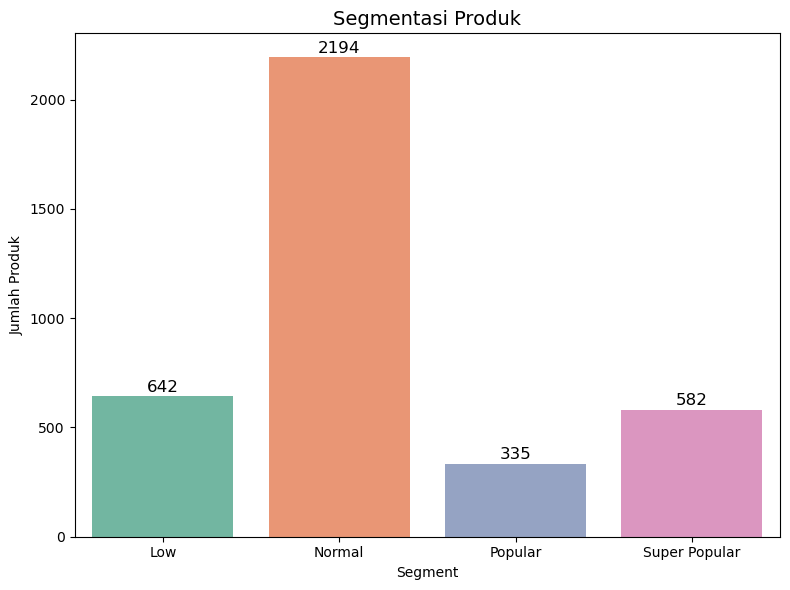

In [218]:
data = {
    'Final Segment': ['Low', 'Normal', 'Popular', 'Super Popular'],
    'Jumlah Produk': [642, 2194, 335, 582]}

df_segment = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_segment, x='Final Segment', y='Jumlah Produk', palette='Set2')

# Tambahkan angka di atas bar
for i, row in df_segment.iterrows():
    plt.text(i, row['Jumlah Produk'] + 20, row['Jumlah Produk'], ha='center', fontsize=12)

plt.title('Segmentasi Produk', fontsize=14)
plt.xlabel('Segment')
plt.ylabel('Jumlah Produk')
plt.tight_layout()
plt.show()

Data menunjukkan distribusi produk dalam beberapa kategori. 
1. Kategori "Normal" memiliki jumlah produk terbanyak, yaitu sekitar 2194 produk
2. Kategori "Low" memiliki 642 produk,
3. "Popular" memiliki 335 produk,
4. "Super Popular" memiliki 582 produk.

### 1. Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019

In [141]:
df_final_segment = df_final_segment.reset_index()

# Tambahkan date pada final segment
df_final_segment = df_final_segment.merge(
    df_sales[['ProductName', 'Date']],
    on='ProductName',
    how='left')

# Filter hanya data bulan November 2019
df_november = df_sales[df_sales['Date'].dt.to_period('M') == '2019-11']

# Ambil data dengan segmentasi 'Super Popular'
df_november = df_final_segment[df_final_segment['Date'].dt.to_period('M') == '2019-11']
super_popular_november = df_november[df_november['final_segment'] == 'Super Popular']
super_popular_november

,ProductName,volume_segment,revenue_segment,final_segment,Date
13,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-11-30
14,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-11-29
15,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-11-29
16,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-11-29
17,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-11-25
...,...,...,...,...,...
522356,Zinc Willie Winkie Candle Stick,Popular,Popular,Super Popular,2019-11-03
522357,Zinc Willie Winkie Candle Stick,Popular,Popular,Super Popular,2019-11-02
522358,Zinc Willie Winkie Candle Stick,Popular,Popular,Super Popular,2019-11-02
522359,Zinc Willie Winkie Candle Stick,Popular,Popular,Super Popular,2019-11-02


In [143]:
super_popular_summary = (
    super_popular_november
    .groupby('ProductName')
    .agg(transaksi_november=('ProductName', 'count'))
    .sort_values('transaksi_november', ascending=False)
)
super_popular_summary

,transaksi_november
ProductName,
Rabbit Night Light,505
Paper Chain Kit 50'S Christmas,403
Hot Water Bottle Keep Calm,296
Paper Chain Kit Vintage Christmas,279
Jumbo Bag 50'S Christmas,270
...,...
Feltcraft Butterfly Hearts,3
Feltcraft Cushion Rabbit,2
Pink Heart Shape Egg Frying Pan,1


Berdasrkan hasil analysis yang dilakukan barang yang paling populer pada bulan November 2019 adalah barang tipe Peralatan Dekorasi,Hadiah, dan Perlengkapan Musiman. Produk-produk tersebut umumnya digunakan untuk dekorasi rumah (khususnya saat liburan seperti Natal atau event musiman), hadiah kecil (giftware) atau souvenir, kerajinan tangan (crafts & DIY), barang bertema Natal / Musim dingin / Lucu & Imut, perlengkapan pesta / event / interior dekoratif. Seperti Rabbit Night Light, Paper Chain Kit 50'S Christmas, Hot Water Bottle Keep Calm, Paper Chain Kit Vintage Christmas, dan Jumbo Bag 50'S Christmas

### 2. Apakah barang yang populer di November 2019 sama dengan barang yang populer di bulan July?

In [145]:
# Filter data hanya untuk bulan July 2019
df_july = df_sales[df_sales['Date'].dt.to_period('M') == '2019-07']

# Gabungkan kembali berdasarkan ProductName (dan pastikan datanya cocok)
df_final_segment['Date'] = pd.to_datetime(df_final_segment['Date'])
df_july = df_final_segment[df_final_segment['Date'].dt.to_period('M') == '2019-07']
super_popular_july = df_july[df_july['final_segment'] == 'Super Popular']
super_popular_july

,ProductName,volume_segment,revenue_segment,final_segment,Date
154,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-07-31
155,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-07-28
156,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-07-28
157,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-07-28
158,10 Colour Spaceboy Pen,Popular,Popular,Super Popular,2019-07-28
...,...,...,...,...,...
522443,Zinc Willie Winkie Candle Stick,Popular,Popular,Super Popular,2019-07-19
522444,Zinc Willie Winkie Candle Stick,Popular,Popular,Super Popular,2019-07-17
522445,Zinc Willie Winkie Candle Stick,Popular,Popular,Super Popular,2019-07-12
522446,Zinc Willie Winkie Candle Stick,Popular,Popular,Super Popular,2019-07-11


In [147]:
super_popular_summary = (
    super_popular_july
    .groupby('ProductName')
    .agg(transaksi_july=('ProductName', 'count'))
    .sort_values('transaksi_july', ascending=False))
super_popular_summary

,transaksi_july
ProductName,
Party Bunting,187
Jumbo Bag Red Retrospot,184
Spotty Bunting,176
Cream Hanging Heart T-Light Holder,172
Lunch Bag Vintage Doily,155
...,...
Garland Wooden Happy Easter,1
Hand Warmer Union Jack,1
Paper Bunting Coloured Lace,1


Dari analisa yang dilakukan ternyata produk super populer di bulan July tidak jauh berbeda dengan produk super popular di bulan Novemeber yaitu Peralatan Dekorasi dan Souvenir. Seperti Party Bunting, Jumbo Bag Red Retrospot,Spotty Bunting, Cream Hanging Heart T-Light Holder, dan Lunch Bag Vintage Doily

# Retention Cohort Analysis

## Transaksi Pertama Customer

In [149]:
# 1. Filter data untuk tahun 2019
df_2019 = df_sales[(df_sales['Date'] >= '2019-01-01') & (df_sales['Date'] <= '2019-12-31')].copy()

# 2. Hitung tanggal transaksi pertama per customer
first_purchase_2019 = df_2019.groupby('CustomerNo')['Date'].min().reset_index()
first_purchase_2019 = first_purchase_2019.rename(columns={'Date': 'first_purchase_date'})

# 3. Tampilkan hasil
first_purchase_2019.sort_values(by='first_purchase_date')

,CustomerNo,first_purchase_date
775,13253.0,2019-01-04
174,12483.0,2019-01-04
825,13319.0,2019-01-04
820,13313.0,2019-01-04
552,12957.0,2019-01-04
...,...,...
3053,16238.0,2019-12-08
912,13436.0,2019-12-08
2438,15439.0,2019-12-08
808,13298.0,2019-12-08


## Iterasi setiap bulan

In [151]:
# Filter hanya data dari tahun 2019
df_2019 = df_sales[(df_sales['Date'] >= '2019-01-01') & (df_sales['Date'] <= '2019-11-30')].copy()

# Hapus data tanpa CustomerNo
df_2019 = df_2019[df_2019['CustomerNo'].notnull()]

# Buat kolom order_month (bulan transaksi) dan cohort_month (bulan pertama customer belanja)
df_2019['order_month'] = df_2019['Date'].dt.to_period('M')
df_2019['cohort_month'] = df_2019.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')

# Hitung selisih bulan antara transaksi dan cohort → cohort_index
def get_month_diff(start, end):
    return (end.year - start.year) * 12 + (end.month - start.month)

df_2019['cohort_index'] = df_2019.apply(
    lambda row: get_month_diff(row['cohort_month'].to_timestamp(), row['order_month'].to_timestamp()),
    axis=1)

# Hitung jumlah customer unik per cohort dan bulan ke-n
cohort_data = df_2019.groupby(['cohort_month', 'cohort_index'])['CustomerNo'].nunique().reset_index()

# Tambahkan kolom count_new_customer (pelanggan baru bulan itu)
count_new_customer = cohort_data[cohort_data['cohort_index'] == 0][['cohort_month', 'CustomerNo']]
count_new_customer = count_new_customer.rename(columns={'CustomerNo': 'count_new_customer'})

# Pivot jadi matriks cohort
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='CustomerNo')

# Hitung rasio retensi
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)

# Gabungkan retention dengan count_new_customer
retention = retention.merge(count_new_customer.set_index('cohort_month'), 
                            left_index=True, right_index=True)

# Tampilkan hasil
retention.fillna(0)

,0,1,2,3,4,5,6,7,8,9,10,count_new_customer
cohort_month,,,,,,,,,,,,
2019-01,1.0,0.335,0.415,0.374,0.437,0.406,0.375,0.369,0.412,0.407,0.495,827
2019-02,1.0,0.225,0.236,0.320,0.301,0.257,0.283,0.313,0.299,0.355,0.000,569
2019-03,1.0,0.161,0.251,0.220,0.243,0.179,0.275,0.244,0.298,0.000,0.000,610
2019-04,1.0,0.224,0.207,0.219,0.202,0.247,0.247,0.295,0.000,0.000,0.000,397
2019-05,1.0,0.184,0.179,0.179,0.214,0.227,0.273,0.000,0.000,0.000,0.000,374
2019-06,1.0,0.184,0.149,0.214,0.217,0.294,0.000,0.000,0.000,0.000,0.000,309
2019-07,1.0,0.153,0.190,0.219,0.302,0.000,0.000,0.000,0.000,0.000,0.000,242
2019-08,1.0,0.198,0.234,0.234,0.000,0.000,0.000,0.000,0.000,0.000,0.000,192
2019-09,1.0,0.247,0.340,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,312


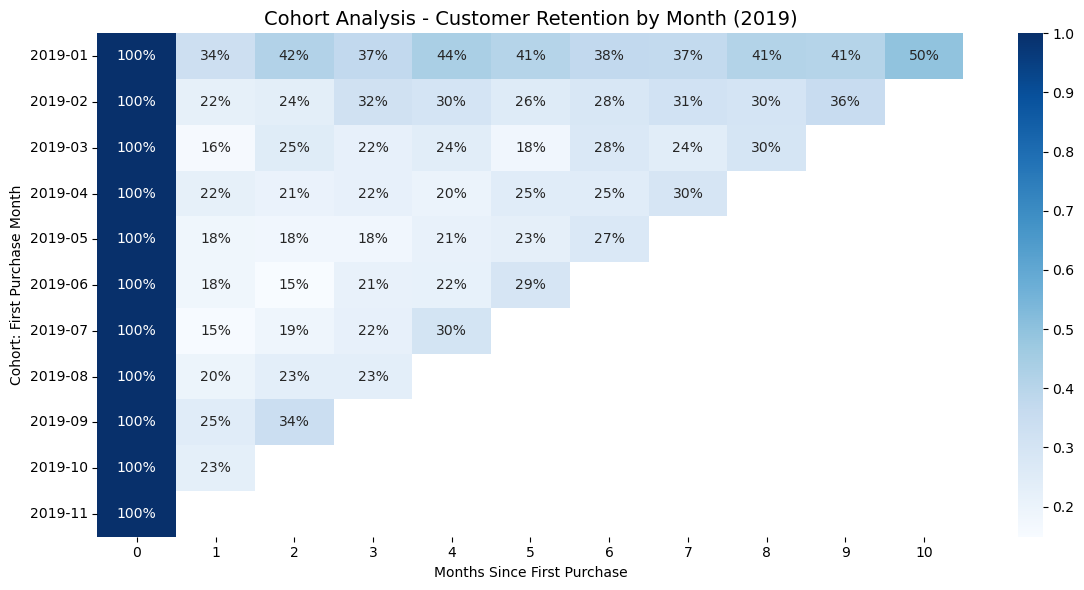

In [152]:
# Pisahkan hanya bagian rasio retensi untuk heatmap (drop kolom count_new_customer)
retention_rate = retention.drop(columns='count_new_customer')

# Buat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(retention_rate, annot=True, fmt='.0%', cmap='Blues')

plt.title('Cohort Analysis - Customer Retention by Month (2019)', fontsize=14)
plt.ylabel('Cohort: First Purchase Month')
plt.xlabel('Months Since First Purchase')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 1. Karakteristik Pertumbuhan Customer Baru

Pertumbuhan Customer Baru pada Januari 2019 mencatat jumlah customer baru tertinggi: 827 pelanggan
Februari – Agustus: terjadi tren penurunan bertahap dari 569 → 192 customer baru.
September – November: terjadi sedikit kenaikan kembali, dengan angka stabil di atas 300-an.

Setelah lonjakan awal di Januari (karena efek awal tahun), terjadi perlambatan pertumbuhan customer baru selama paruh pertama tahun.
Namun, mulai September terlihat pemulihan atau kenaikan kembali jumlah customer baru hingga November.
Ini bisa mengindikasikan adanya musim belanja akhir tahun, promosi, atau strategi marketing yang berhasil menarik kembali pelanggan baru.

Dari sini dapat disimpulkan bahwa Karakteristik pertumbuhan customer baru di Tahun 2019 adalah melambat.

### 2. Bulan Yang Menghasilkan Retention Paling Tinggi

Cohort Januari 2019 memiliki retensi tertinggi sebesar 49.5% di bulan ke-10 → artinya hampir setengah dari customer yang pertama kali belanja di Januari masih melakukan pembelian 10 bulan kemudian.
Ini menunjukkan bahwa campaign marketing di bulan Januari kemungkinan paling berhasil mempertahankan customer dalam jangka panjang.
Bulan lainnya cenderung memiliki retensi maksimal < 35%.

# Time Series analysis

## Trend Penjualan Harian

In [62]:
# Agregasi penjualan harian
df_daily_sales = df_sales.groupby('Date').agg({'ProductName': 'count'}).reset_index()
df_daily_sales.columns = ['Date', 'Daily_sales']
df_daily_sales

,Date,Daily_sales
0,2018-12-01,3014
1,2018-12-02,2016
2,2018-12-03,2119
3,2018-12-05,2589
4,2018-12-06,3773
...,...,...
300,2019-12-05,5257
301,2019-12-06,3219
302,2019-12-07,2353
303,2019-12-08,4828


NameError: name 'mdates' is not defined

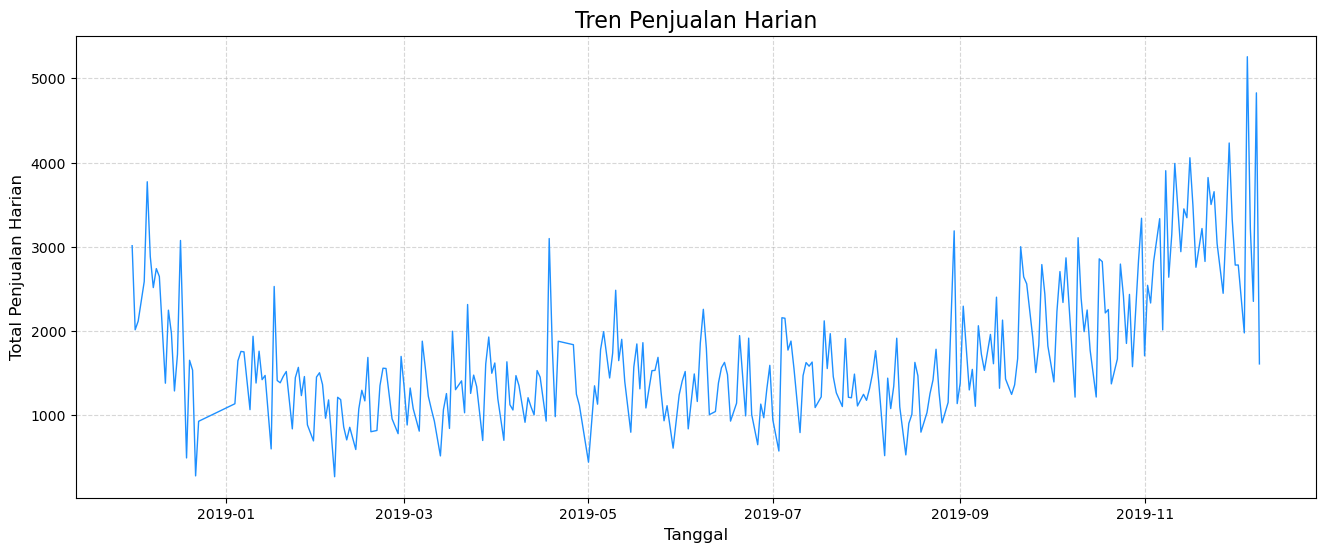

In [64]:
# Plot tren penjualan harian
plt.figure(figsize=(16, 6))
plt.plot(df_daily_sales['Date'], df_daily_sales['Daily_sales'], color='dodgerblue', linewidth=1)

# Tambahan styling
plt.title('Tren Penjualan Harian', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Penjualan Harian', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Format sumbu x agar lebih terbaca
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Dari data yang tersedia dapat dilihat bahwa Penjualan harian cukup berfluktuasi. Hal ini bisa dikarenakan adanya faktor eksternal seperti promo, musim liburan, atau perilaku belanja mingguan. Menjelang akhir Tahun mulai bulan November hingga Desember penjualan meningkat sangat signifikan. Namun secara Keseluruhan dari awal hingga akhir tahun menunjukkan tren naik.
1. Awal Tahun 2019 (Januari - Maret), Terlihat aktivitas tinggi di awal Januari, tetapi kemudian menurun tajam dan stabil di level rendah hingga pertengahan tahun. Pola ini bisa dikaitkan dengan musim belanja setelah tahun baru atau promo awal tahun.
2. Pertengahan Tahun (April - Agustus), Grafik menunjukkan stabilitas dengan fluktuasi ringan di sekitar nilai tengah. Tidak ada lonjakan besar, menunjukkan minimnya kampanye atau event besar di periode ini.
3. Akhir Tahun (September - Desember), Terjadi kenaikan signifikan dan konsisten mulai sekitar September dan memuncak di akhir November–Desember.Kenaikan tajam ini kemungkinan dipicu oleh:
   - Event promo besar (11.11, Black Friday, Harbolnas 12.12).
   - Persiapan liburan akhir tahun / Natal & Tahun Baru.

## Total Order Per Hari

In [153]:
# Tambahkan kolom hari
df_sales['Weekday_Name'] = df_sales['Date'].dt.day_name()

# Hitung total order per hari dalam seminggu
order_per_day = df_sales.groupby('Weekday_Name')['TransactionNo'].count().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

order_per_day

Weekday_Name
Monday       79226.0
Tuesday          NaN
Wednesday    62198.0
Thursday     92028.0
Friday       98406.0
Saturday     91038.0
Sunday       99706.0
Name: TransactionNo, dtype: float64

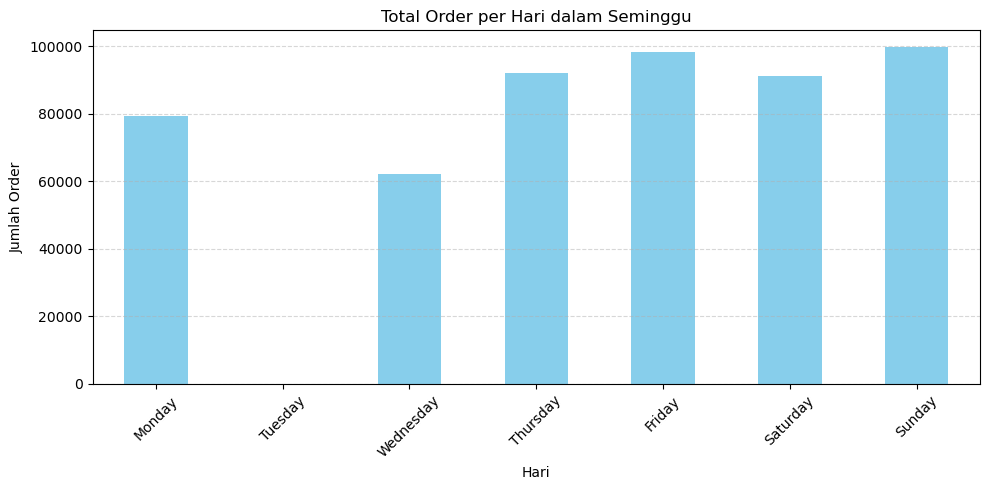

In [154]:
plt.figure(figsize=(10,5))
order_per_day.plot(kind='bar', color='skyblue')
plt.title('Total Order per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Dari hasil analisis yang dilakukan dapat dilihat bahwa:
1. Puncak Transaksi (High Traffic Days) adalah Minggu (Sunday) = Hari dengan total transaksi tertinggi, diikuti oleh Jumat (Friday), Kamis (Thursday),
    Sabtu (Saturday)
2. Hari Sepi Transaksi:
   * Rabu (Wednesday) adalah yang paling rendah
   * Senin (Monday) sedikit lebih tinggi tapi tetap rendah
   * Selasa (Tuesday) tidak tercatat (NaN), menandakan Transaksi hari Selasa belum masuk atau memang tidak terjadi
3. Jelas terlihat bahwa transaksi meningkat mendekati dan saat akhir pekan. Hal ini umum dalam perilaku konsumen ritel, baik online maupun offline

# Price Elasticity

## Produk yang paling sering mengalami perubahan harga

In [155]:
# Hitung jumlah harga unik per produk
price_variation = df_sales.groupby('ProductName')['Price'].nunique().reset_index()
price_variation = price_variation.rename(columns={'Price': 'unique_price_count'})

# Filter produk dengan setidaknya 10 variasi harga berbeda
frequent_price_change = price_variation[price_variation['unique_price_count'] >= 10]

# Urutkan dari yang paling banyak variasi harga
frequent_price_change = frequent_price_change.sort_values(by='unique_price_count', ascending=False)

# Tampilkan hasil
print(frequent_price_change)

                            ProductName  unique_price_count
694                       Chilli Lights                  23
796           Cook With Wine Metal Sign                  20
1584  Hot Water Bottle Tea And Sympathy                  20
965                 Doormat New England                  19
967               Doormat Red Retrospot                  19
...                                 ...                 ...
2855     Set 12 Kids White Chalk Sticks                  10
1279       Full English Breakfast Plate                  10
2861  Set 20 Napkins Fairy Cakes Design                  10
1201     Folding Butterfly Mirror Ivory                  10
1950                Mint Kitchen Scales                  10

[700 rows x 2 columns]


NameError: name 'monthly_trend' is not defined

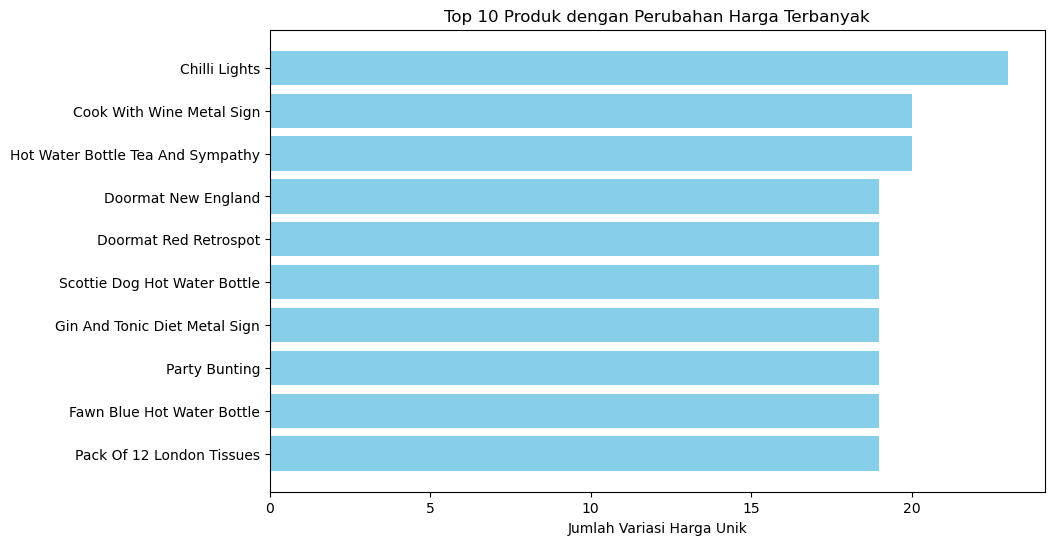

In [156]:
# Ambil 10 besar produk dengan variasi harga terbanyak
top_products = frequent_price_change.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_products['ProductName'], top_products['unique_price_count'], color='skyblue')
plt.xlabel('Jumlah Variasi Harga Unik')
plt.title('Top 10 Produk dengan Perubahan Harga Terbanyak')
plt.gca().invert_yaxis()

for x, y in zip(monthly_trend['order_month'], monthly_trend['Total_Revenue']):
    plt.text(x, y + 10000,f'{y/1e6:.1f} Juta', ha='center', va='bottom', fontsize=9)
    
plt.tight_layout()
plt.show()

Berdasarkan hasil analisa yang dilakukan perubahan paling sering terjadi pada produk Chilli Lights, selanjutnya Cook With Wine Metal Sign, Hot Water Bottle Tea And Sympathy, Doormat New England, Doormat Red Retrospot. Chilli Lights mengalami perubahan harga paling sering (lebih dari 22 kali).Produk lainnya seperti Cook With Wine Metal Sign, Hot Water Bottle Tea And Sympathy, dan Doormat New England juga memiliki variasi harga yang tinggi (sekitar 19-20 kali). Semua produk di daftar ini mengalami lebih dari 18 kali perubahan harga, menunjukkan adanya volatilitas harga yang tinggi.

1. Tingginya Frekuensi Perubahan Harga bisa disebabkan oleh ketidakstabilan dalam supply chain, strategi diskon/promosi musiman, atau percobaan strategi pricing. Produk-produk seperti lampu hias, doormat, dan hot water bottle adalah produk musiman atau tematik, yang mungkin memicu penyesuaian harga secara berkala.
2. Potensi Kebingungan Konsumen, perubahan harga yang terlalu sering dapat menyebabkan konsumen merasa tidak yakin kapan waktu terbaik untuk membeli. Bisa menurunkan kepercayaan jika harga terlihat tidak stabil atau tidak konsisten.
3. Perubahan harga terus-menerus bisa mencerminkan upaya mencari margin ideal atau menyesuaikan dengan permintaan pasar. Namun, jika tidak dikendalikan, hal ini bisa memotong margin keuntungan karena terlalu banyak diskon atau markdown.

Rekomendasi yang dapat dilakukan:
- Lakukan Evaluasi Strategi Pricing, Identifikasi penyebab utama fluktuasi: apakah karena stok, promosi, musim, atau kesalahan manajemen harga. Terapkan dynamic pricing berbasis permintaan dan data pasar, bukan hanya estimasi manual.
- Segmentasikan Produk dapat dilakukan dengan mengklasifikasikan produk berdasarkan pola permintaan, menerapkan strategi harga tetap (fixed pricing) untuk produk non-musiman agar stabil.
- Monitoring Otomatis Harga dengan menggunakan sistem manajemen harga otomatis berbasis AI/data untuk mengurangi fluktuasi tidak perlu dan memaksimalkan margin.
- Jika memang perlu ada perubahan harga, tampilkan alasan secara transparan kepada pelanggan (misalnya diskon khusus, stok clearance, atau promosi edisi terbatas).
-Tinjau efektivitas promosi terhadap konversi. Jika promosi menyebabkan banyak perubahan harga namun tidak signifikan menaikkan penjualan, perlu dikaji ulang.

## Korelasi antara harga dengan quantity untuk setiap barang

In [163]:
# Pastikan data bersih
df_clean = df_sales.dropna(subset=['ProductName', 'Price', 'Quantity'])

#  Hitung jumlah variasi harga unik per produk
price_variation = df_clean.groupby('ProductName')['Price'].nunique().reset_index()
price_variation = price_variation.rename(columns={'Price': 'unique_price_count'})

#  Ambil hanya produk dengan ≥10 variasi harga
products_with_many_prices = price_variation[price_variation['unique_price_count'] >= 10]['ProductName']

#  Filter data untuk produk-produk tersebut
df_filtered = df_clean[df_clean['ProductName'].isin(products_with_many_prices)]

#  Hitung korelasi antara Price dan Quantity per produk
correlations = []

for product in products_with_many_prices:
    temp = df_filtered[df_filtered['ProductName'] == product]
    
    # Korelasi hanya bisa dihitung kalau ada >1 nilai unik
    if temp['Price'].nunique() > 1 and temp['Quantity'].nunique() > 1:
        corr = temp['Price'].corr(temp['Quantity'])
        correlations.append({'ProductName': product, 'Price_Quantity_Corr': corr})
        
#  Buat DataFrame hasil korelasi
corr_df = pd.DataFrame(correlations)

#  Urutkan dari korelasi paling negatif ke positif
corr_df_sorted = corr_df.sort_values(by='Price_Quantity_Corr')
corr_df_sorted

,ProductName,Price_Quantity_Corr
521,Set Of 2 Tea Towels Ping Microwave,-0.476031
598,Squarecushion Cover Pink Union Jack,-0.461947
426,Pizza Plate In Box,-0.449962
311,Large Cake Towel Pink Spots,-0.439484
60,Bag 500g Swirly Marbles,-0.436841
...,...,...
486,Roll Wrap 50'S Red Christmas,0.133286
560,Set/10 Ivory Polkadot Party Candles,0.134109
24,6 Gift Tags 50'S Christmas,0.137806
18,3d Traditional Christmas Stickers,0.143960


In [164]:
# lihat produk dengan korelasi paling negatif
most_negative_corr = corr_df_sorted.iloc[0]

# Tampilkan
print("Produk dengan korelasi paling negatif antara Price dan Quantity:")
print(most_negative_corr)

Produk dengan korelasi paling negatif antara Price dan Quantity:
ProductName            Set Of 2 Tea Towels Ping Microwave
Price_Quantity_Corr                             -0.476031
Name: 521, dtype: object


Rekomendasi Strategis
1. Untuk Produk dengan Korelasi Negatif:
   * Hati-hati menaikkan harga → bisa berdampak besar pada penurunan volume penjualan.
   * Gunakan promosi bundling / diskon untuk meningkatkan pembelian.
   * Pertimbangkan produksi massal untuk menurunkan harga jual per unit.
2. Untuk Produk dengan Korelasi Positif:
   * Posisikan sebagai produk premium / eksklusif jika tren naik harga justru menaikkan volume.
   * Perhatikan musiman (misalnya produk natal), bisa dimanfaatkan dalam strategi kampanye.

## Scatter Plot

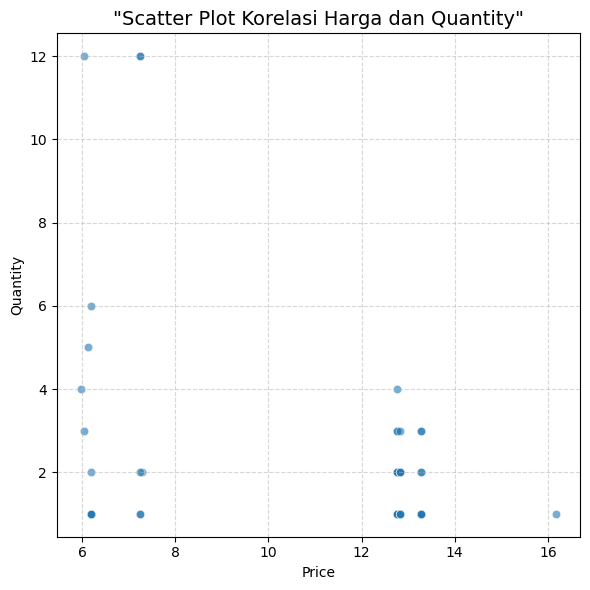

In [167]:
# Ambil nama produk dengan korelasi paling negatif
product_name = most_negative_corr['ProductName']

# Filter data hanya untuk produk tersebut
product_data = df_filtered[df_filtered['ProductName'] == product_name]

# Buat scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=product_data, x='Price', y='Quantity', alpha=0.6)

plt.title(f'"Scatter Plot Korelasi Harga dan Quantity"', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Berdasarkan hasil sebelumnya, produk tersebut memiliki korelasi paling negatif antara harga dan quantity. Artinya saat harga naik, jumlah unit yang terjual cenderung menurun.
Produk ini price-elastic atau elastis terhadap harga, yang berarti:
1. Konsumen peka terhadap perubahan harga.
2. Kenaikan harga akan menyebabkan penurunan permintaan secara signifikan.
3. Strategi menaikkan harga perlu dipertimbangkan hati-hati, karena bisa merugikan secara total revenue (meskipun margin per unit naik).
4. Lebih baik difokuskan pada volume atau loyalitas pelanggan untuk produk ini.

# Basket Size Analysis

## Rata-rata basket size seluruh transaksi per hari

In [169]:
# Hitung total quantity dan jumlah transaksi unik per hari
daily_metrics = df_sales.groupby('Date').agg({
    'TransactionNo': pd.Series.nunique,
    'Quantity': 'sum'
}).reset_index()

# Hitung rata-rata basket size per hari
daily_metrics['avg_basket_size'] = daily_metrics['Quantity'] / daily_metrics['TransactionNo']
daily_metrics

,Date,TransactionNo,Quantity,avg_basket_size
0,2018-12-01,127,26785,210.905512
1,2018-12-02,141,31232,221.503546
2,2018-12-03,68,16123,237.102941
3,2018-12-05,88,16149,183.511364
4,2018-12-06,103,21689,210.572816
...,...,...,...,...
300,2019-12-05,126,43705,346.865079
301,2019-12-06,114,30371,266.412281
302,2019-12-07,105,41783,397.933333
303,2019-12-08,120,34971,291.425000


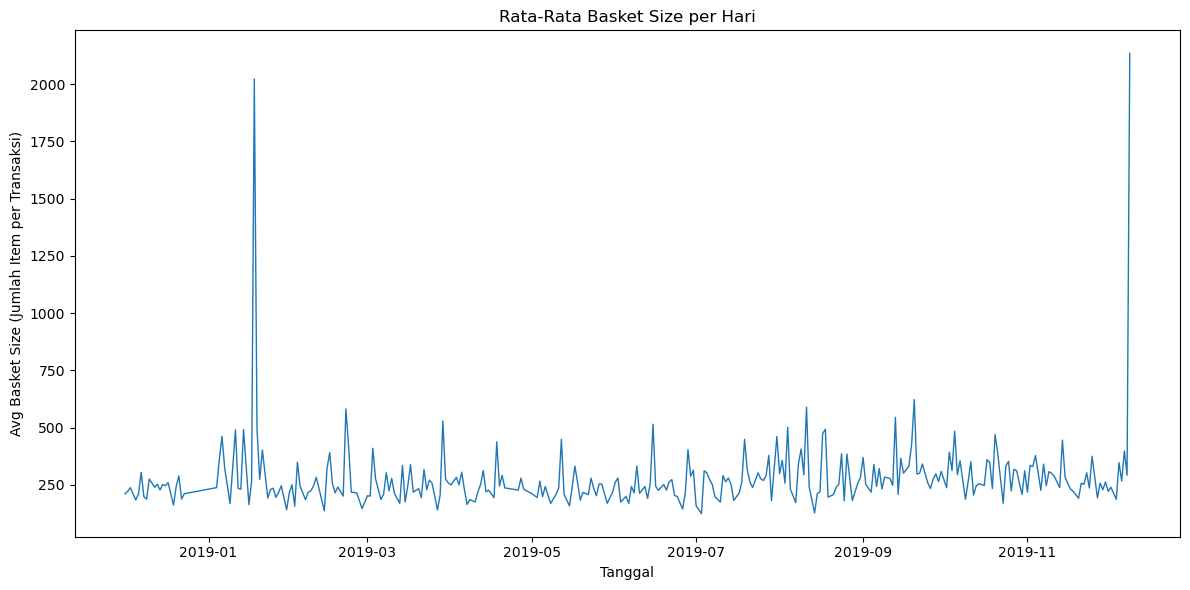

In [195]:
# Plot tren basket size

plt.figure(figsize=(12,6))
plt.plot(daily_metrics['Date'], daily_metrics['avg_basket_size'], linewidth=1)
plt.title('Rata-Rata Basket Size per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Avg Basket Size (Jumlah Item per Transaksi)')
plt.tight_layout()
plt.show()

Dari Grafik dapat dilihat 
1. Umumnya rata-rata basket size per hari berkisar antara 180–400 unit per transaksi.
2. Outlier besar pada 2019-12-09 (2134 item per transaksi).Ini tidak wajar, jauh dari nilai rata-rata hari lainnya. Hal ini kemungkin terjadi dikarenakan kesalahan input (misalnya Quantity salah input),transaksi besar dari reseller/bulk buyer, atau sistem gagal mencatat jumlah transaksi secara akurat

## Perbedaan ukuran basket dari tiap Negara

In [173]:
# Hitung total quantity dan jumlah transaksi unik per negara
country_basket = df_clean.groupby('Country').agg({
    'TransactionNo': pd.Series.nunique,
    'Quantity': 'sum'
}).reset_index()

# Hitung rata-rata basket size
country_basket['avg_basket_size'] = country_basket['Quantity'] / country_basket['TransactionNo']

# Urutkan dari negara dengan basket size terbesar
country_basket = country_basket.sort_values(by='avg_basket_size', ascending=False)

# Tampilkan hasil
country_basket

,Country,TransactionNo,Quantity,avg_basket_size
24,Netherlands,94,200834,2136.531915
0,Australia,62,85742,1382.935484
30,Singapore,4,5234,1308.500000
20,Japan,20,26053,1302.650000
32,Sweden,33,35847,1086.272727
25,Norway,28,17280,617.142857
33,Switzerland,55,30801,560.018182
5,Canada,5,2754,550.800000
10,EIRE,277,146560,529.097473
1,Austria,11,5639,512.636364


C:\Users\sahar\AppData\Local\Temp\ipykernel_13396\2831655884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_basket.head(10), x='avg_basket_size', y='Country', palette='viridis')


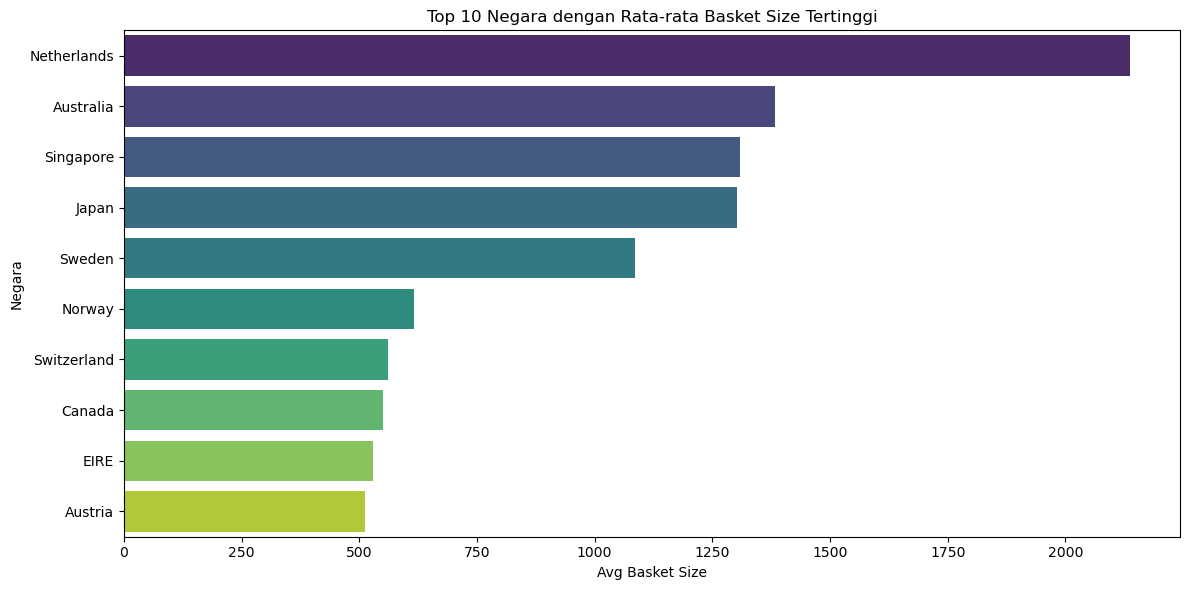

In [175]:
plt.figure(figsize=(12,6))
sns.barplot(data=country_basket.head(10), x='avg_basket_size', y='Country', palette='viridis')
plt.title('Top 10 Negara dengan Rata-rata Basket Size Tertinggi')
plt.xlabel('Avg Basket Size')
plt.ylabel('Negara')
plt.tight_layout()
plt.show()

Hasil ini menunjukkan bahwa terdapat perbedaan ukuran basket dari negara yang berbeda, dan perbedaannya cukup signifikan. 
1. Negara seperti Netherlands dan Australia memiliki rata-rata jumlah item per transaksi yang jauh lebih besar dari negara lain → bisa jadi karena:
   * Beli dalam jumlah besar (wholesale/reseller)
   * Preferensi belanja borongan
   * Promo lokal tertentu
2. Ada perbedaan besar antar negara. Misalnya:
   * Rata-rata transaksi dari Netherlands berisi >2.000 item, sementara dari Austria atau EIRE hanya sekitar 500.
3. Negara-negara seperti Netherlands, Australia, Singapore, dan Japan cenderung melakukan pembelian dalam jumlah besar per transaksi. Ini bisa jadi
   karena:
   * Pelanggan reseller atau grosir
   * Kebutuhan bisnis
   * Kebiasaan belanja dalam jumlah besar
4. Sedangkan Austria, EIRE, dan Norway menunjukkan pembelian dalam jumlah lebih kecil → mungkin lebih dominan retail customer (eceran).

Rekomendasi:
1. Fokus Strategi Upsell & Cross-sell di Negara High Basket seperti Netherlands, Australia, Singapore: Peluang tinggi untuk memaksimalkan upsell & bundling. Promosi produk pelengkap bisa berhasil karena keranjang mereka memang besar.

2. Analisis lebih lanjut perilaku pelanggan di Belanda. Lihat kategori produk paling sering dibeli.
3. Ciptakan segmentasi berdasarkan “basket behavior”. Buat kampanye pemasaran berdasarkan ukuran keranjang, bukan hanya demografi.Tawarkan diskon bulk di negara dengan basket kecil untuk mendorong pembelian lebih banyak.
4. Optimalisasi logistik di negara dengan basket besa karena transaksi besar bisa berarti volume tinggi, pastikan pengemasan & pengiriman efisien. Kurangi biaya logistik/unit dengan strategi pengiriman bulk.

# Crusial Question

## Tren penjualan beberapa bulan terakhir

In [177]:
# Tambahkan kolom bulan (Year-Month)
df_sales['order_month'] = df_sales['Date'].dt.to_period('M')

# Hitung total quantity dan revenue per bulan
monthly_trend = df_sales.groupby('order_month').agg({
    'Quantity': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

# Konversi kembali ke datetime untuk plotting
monthly_trend['order_month'] = monthly_trend['order_month'].dt.to_timestamp()
monthly_trend

,order_month,Quantity,Total_Revenue
0,2018-12-01,357407,4397648.39
1,2019-01-01,386332,4548423.47
2,2019-02-01,282587,3327342.64
3,2019-03-01,376809,4384669.82
4,2019-04-01,307509,3579310.06
5,2019-05-01,394572,4569952.21
6,2019-06-01,388543,4486132.15
7,2019-07-01,398750,4571494.88
8,2019-08-01,421286,4749801.23
9,2019-09-01,568844,6613772.79


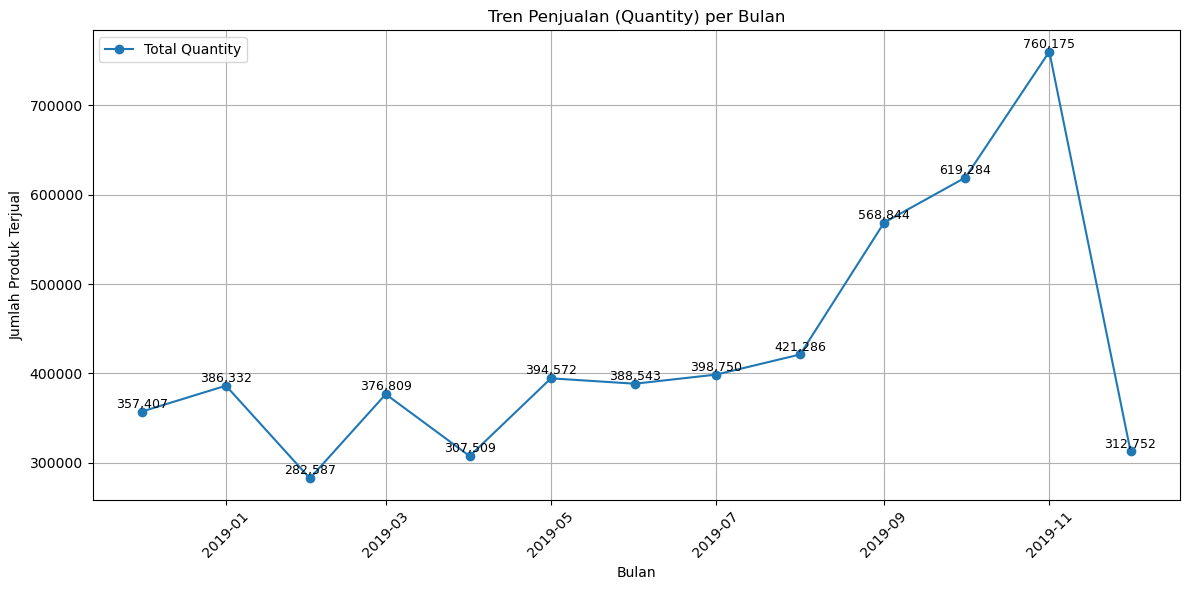

NameError: name 'formatter' is not defined

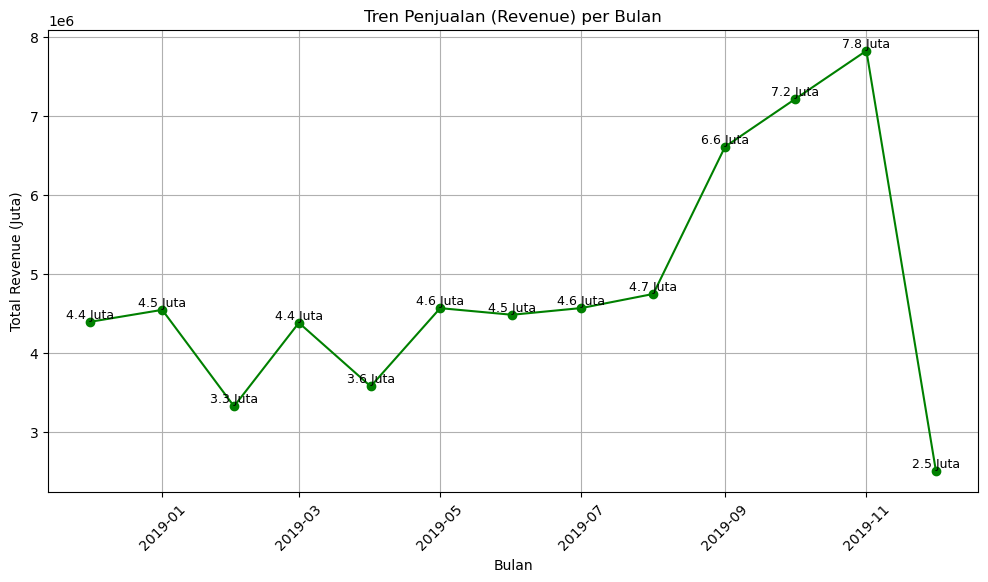

In [179]:
# Plot tren Quantity per bulan
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['order_month'], monthly_trend['Quantity'], marker='o', label='Total Quantity')
plt.title('Tren Penjualan (Quantity) per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk Terjual')
plt.xticks(rotation=45)
plt.grid(True)

# Tambahkan nilai Quantity pada marker
for x, y in zip(monthly_trend['order_month'], monthly_trend['Quantity']):
    plt.text(x, y + 1000,f'{y:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.legend()
plt.show()


# Plot tren Revenue per bulan
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['order_month'], monthly_trend['Total_Revenue'], marker='o', color='green', label='Total Revenue')
plt.title('Tren Penjualan (Revenue) per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue (Juta)')
plt.xticks(rotation=45)
plt.grid(True)

# Tambahkan nilai Revenue pada marker (dalam satuan asli)
for x, y in zip(monthly_trend['order_month'], monthly_trend['Total_Revenue']):
    plt.text(x, y + 10000,f'{y/1e6:.1f} Juta', ha='center', va='bottom', fontsize=9)

plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.legend()
plt.show()

Analisis Tren
1. Tren Kenaikan hingga November 2019.
   * Terlihat pertumbuhan konsisten dari awal tahun sampai November 2019.
   * Puncak penjualan terjadi di November 2019, baik dari sisi kuantitas (760.175 unit) maupun revenue (7,8 juta).
2. Lonjakan signifikan sejak September–November. September: 568 ribu unit → November: 760 ribu unit. Ini menunjukkan momen puncak musiman, bisa jadi karena:
   * Promo akhir tahun
   * Persiapan liburan / Natal
   * Diskon besar (misalnya Black Friday, Harbolnas, dll.)

Dapat disimpulkan bahwa November adalah bulan terbaik: momentum promo/liburan sangat kuat. Pertumbuhan stabil terlihat dari Mei–Oktober, yang menunjukkan loyalitas pasar.

## Produk apa yang paling sering dibeli

In [201]:
# Hitung total Quantity per produk
most_bought_product = df_sales.groupby('ProductName')['ProductName'].count().sort_values(ascending=False)
most_bought_product.head(10)

ProductName
Cream Hanging Heart T-Light Holder    2324
Jumbo Bag Red Retrospot               2112
Regency Cakestand 3 Tier              2010
Party Bunting                         1701
Lunch Bag Red Retrospot               1584
Assorted Colour Bird Ornament         1478
Popcorn Holder                        1419
Set Of 3 Cake Tins Pantry Design      1392
Pack Of 72 Retrospot Cake Cases       1355
Lunch Bag Suki Design                 1308
Name: ProductName, dtype: int64

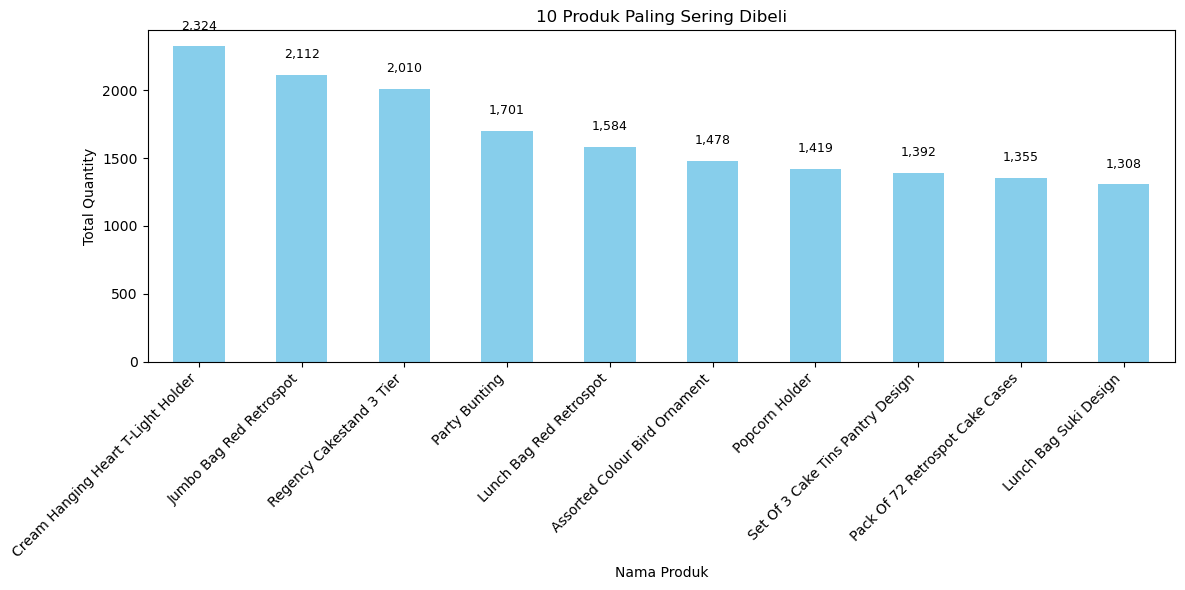

In [203]:
# Ambil 10 produk teratas
top_products = most_bought_product.head(10).astype(float)

# Buat plot batang
plt.figure(figsize=(12, 6))
ax = top_products.plot(kind='bar', color='skyblue')

plt.title('10 Produk Paling Sering Dibeli')
plt.xlabel('Nama Produk')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')

# Tambahkan label angka di atas masing-masing bar
for i, qty in enumerate(top_products):
    plt.text(i, qty + 100, f'{qty:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

- Produk dekoratif seperti Cream Hanging Heart T-Light Holder dan Assorted Colour Bird Ornament sangat diminati — menandakan permintaan kuat terhadap produk dekoratif rumah tangga.
- Produk dengan tema Retrospot muncul 3 kali di 10 besar seperti Jumbo Bag Red Retrospot, Lunch Bag Red Retrospot, Pack Of 72 Retrospot Cake Cases ini mengindikasikan bahwa desain Retrospot sangat populer dan bisa dikembangkan lebih lanjut.
- Produk utilitas untuk pesta/kue seperti Cake Tins, Cake Cases, dan Party Bunting juga banyak diminati, menunjukkan peluang di kategori party supplies.
- Lunch Bag muncul dua kali dalam daftar (Red Retrospot & Skull Design), menunjukkan tingginya permintaan produk fungsional dengan desain menarik.

## Banyak produk yang dibeli pelanggan dalam setiap transaksi

In [214]:
# Group by CustomerNo and TransactionNo, then sum the Quantity
products_per_transaction = df_sales.groupby(['CustomerNo', 'TransactionNo'])['Quantity'].sum().reset_index()

# Rename column for clarity
products_per_transaction.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)
print(products_per_transaction)

       CustomerNo TransactionNo  Total_Products_Purchased
0         12004.0        551004                       104
1         12006.0        552006                         2
2         12008.0        546008                       421
3         12013.0        539013                         3
4         12024.0        557024                        14
...           ...           ...                       ...
19784     18283.0        579673                       133
19785     18283.0        580872                       142
19786     18287.0        554065                       488
19787     18287.0        570715                       990
19788     18287.0        573167                       108

[19789 rows x 3 columns]


In [207]:
#Banyak Transaksi Produk PerBulan

# Buat DataFrame yang menyimpan informasi produk, tanggal, dan transaksi
df_most_bought_product = df_sales[['TransactionNo', 'ProductName', 'Date']].copy()

# Pastikan kolom Date bertipe datetime
df_most_bought_product['Date'] = pd.to_datetime(df_most_bought_product['Date'])

# Tambahkan kolom tahun
df_most_bought_product['Month'] = df_most_bought_product['Date'].dt.month

# Hitung jumlah transaksi per produk per tahun
product_monthly = df_most_bought_product.groupby(['Month', 'ProductName'])['TransactionNo'].nunique().reset_index()

# Ambil produk dengan transaksi terbanyak tiap tahun
idx = product_monthly.groupby('Month')['TransactionNo'].idxmax()
df_top_category_trend = product_monthly.loc[idx].sort_values('Month').reset_index(drop=True)

# Tampilkan hasil
print(df_top_category_trend)

    Month                         ProductName  TransactionNo
0       1  Cream Hanging Heart T-Light Holder            173
1       2    Set Of 3 Cake Tins Pantry Design            152
2       3            Regency Cakestand 3 Tier            194
3       4                       Party Bunting            193
4       5                       Party Bunting            243
5       6                       Party Bunting            207
6       7                       Party Bunting            187
7       8             Jumbo Bag Red Retrospot            177
8       9             Jumbo Bag Red Retrospot            218
9      10      Paper Chain Kit 50'S Christmas            231
10     11                  Rabbit Night Light            487
11     12  Cream Hanging Heart T-Light Holder            299


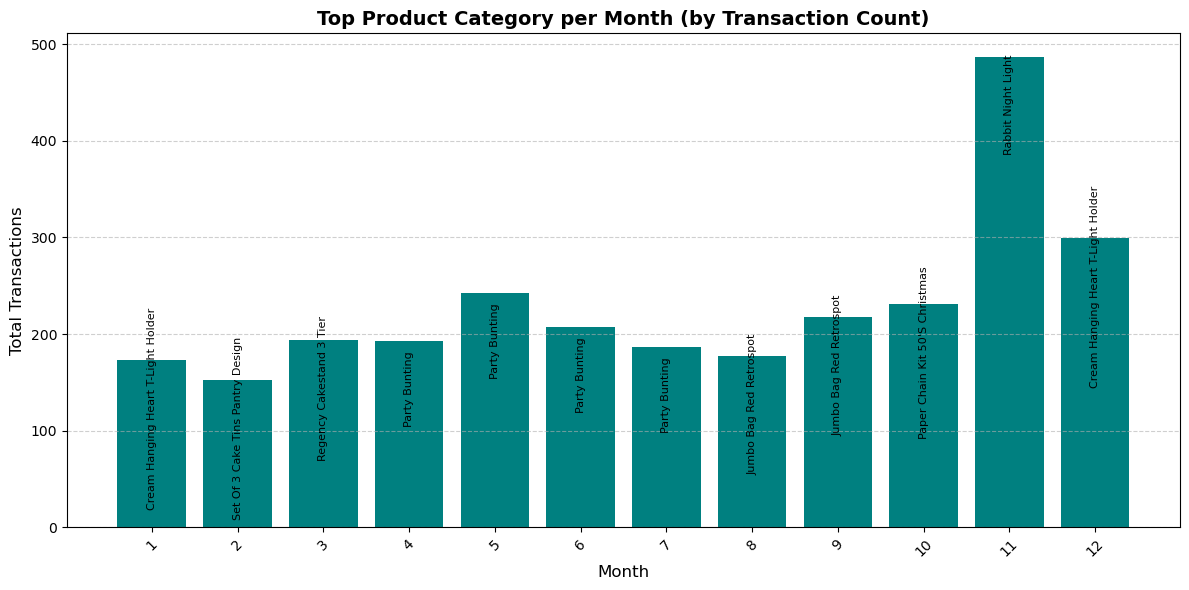

In [187]:
# Ambil data
months = df_top_category_trend['Month'].astype(str)
transaction_counts = df_top_category_trend['TransactionNo']
product_names = df_top_category_trend['ProductName']

plt.figure(figsize=(12, 6))

x_pos = range(len(months))
bars = plt.bar(x_pos, transaction_counts, color='teal')

plt.title('Top Product Category per Month (by Transaction Count)', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(x_pos, months, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tambahkan label produk yang sejajar dan rapi
for x, y, name in zip(x_pos, transaction_counts, product_names):
        plt.text(
            x=x,
            y=y-50,
            s=name,
            ha='center',
            va='center',
            fontsize=8,
            color='black',
            rotation=90)
plt.tight_layout()
plt.show()

## Segmen pelanggan yang paling menguntungkan

In [189]:
# Gabungkan df_final_segment dengan df_sales berdasarkan ProductName dan Date
df_merged = df_final_segment.merge(
    df_sales[['ProductName', 'Date', 'TransactionNo', 'CustomerNo', 'Total_Revenue']],
    on=['ProductName', 'Date'],
    how='left')

# Hitung total revenue per pelanggan
customer_revenue = df_sales.groupby('CustomerNo')['Total_Revenue'].sum().reset_index()

# Gabungkan total revenue ke df_merged
df_merged = df_merged.merge(customer_revenue, on='CustomerNo', how='left')

# Hitung total revenue per segment
segment_profit = df_merged.groupby('final_segment')['Total_Revenue_y'].sum().sort_values(ascending=False)

print(segment_profit)


final_segment
Super Popular    7.014698e+10
Normal           1.706486e+10
Popular          1.021549e+10
Low              1.365552e+08
Name: Total_Revenue_y, dtype: float64


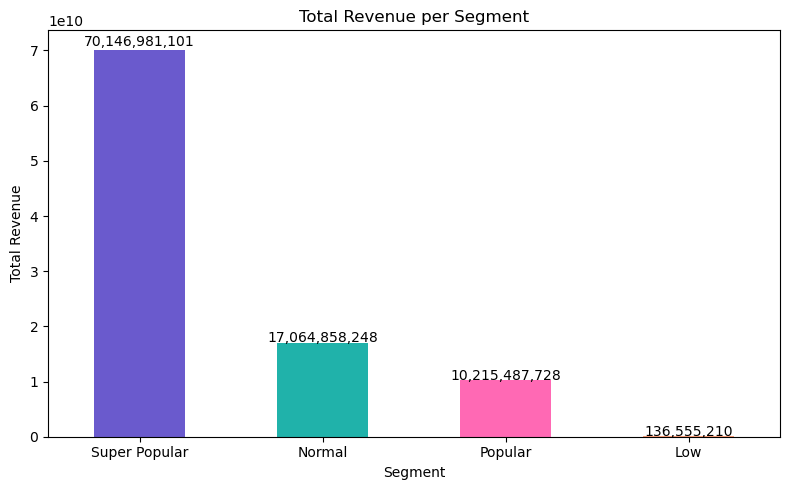

In [225]:
plt.figure(figsize=(8, 5))
segment_profit.plot(kind='bar', color=['#6A5ACD', '#20B2AA', '#FF69B4', '#FFA07A'])

# Tambahan keterangan
plt.title('Total Revenue per Segment')
plt.ylabel('Total Revenue')
plt.xlabel('Segment')
plt.xticks(rotation=0)

# Tambahkan label di atas bar
for idx, value in enumerate(segment_profit):
    plt.text(idx, value + value * 0.01, f'{value:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Segmentasi Pelanggan berdasarkan Profitabilitas:
1. Super Popular (70,15 Miliar) adalah segmen pelanggan paling menguntungkan.
2. Normal (17,06 Miliar) merupakan kontributor revenue cukup besar namun tidak sebesar “Super Popular”. Kemungkinan Transaksi cukup sering, nilai sedang. Untuk itu perlu didorong naik ke segmen “Super Popular” dengan promosi bertarget, gunakan remarketing dan penawaran upsell.
3. Popular (10,22 Miliar) Segmen dengan kontribusi sedang ke bawah. Perlu dilakukan edukasi produk dan promosi agar volume transaksi meningkat.
4. Low (136,56 Juta) Segmen paling kecil kontribusinya terhadap revenue. Kemungkinan dikarenakan transaksi jarang dan nilai kecil. Jalankan kampanye reaktivasi (email reminder, voucher belanja). Lakukan survei untuk mengetahui improvement yang harus dilakukan.

## Rekomendasikan bisnis

1. Fokus pada Pelanggan “Super Popular” (High Value Customers) untuk mempertahankan dan memperluas kontribusi pelanggan top
   - Layanan prioritas: Berikan akses eksklusif ke layanan pelanggan premium.
   - Loyalty program: Beri poin reward, cashback, atau voucher bagi pelanggan yang sering beli.
   - Personalisasi komunikasi: Kirimkan rekomendasi produk dan promo berdasarkan riwayat belanja mereka.
   - Tawarkan akses lebih awal ke produk baru karena mereka sudah menyumbang >70% revenue, lebih murah mempertahankan pelanggan
     ini daripada mencari yang baru.
2. Upsell dan Cross-sell ke Segmen “Normal” & “Popular” untuk mendorong mereka naik kelas menjadi Super Popular dengan cara:
   - Rekomendasi produk serupa di halaman checkout atau setelah pembelian.
   - Bundle promo untuk meningkatkan nilai keranjang belanja.
   - Email marketing otomatis saat mereka belum belanja dalam periode tertentu.
   - Diskon volume atau loyalti untuk pembelian kedua atau ketiga karena mereka sudah menunjukkan ketertarikan dan potensi
     profit lebih besar, hanya perlu sedikit dorongan.
3. Aktivasi Kembali Pelanggan “Low” untuk mengembalikan mereka menjadi pelanggan aktif
   - Kirim notifikasi dengan subjek menarik, “Kami merindukan Anda! Ini voucher 20%”.
   - Survei singkat tanyakan kenapa mereka tidak kembali membeli, beri insentif untuk mengisi survei.
   - Tawarkan produk murah atau diskon besar untuk menarik kembali minat.
4. Optimalkan Produk-produk High Performer seperti Paper Craft Little Birdie, Medium Ceramic Top Storage Jar, dll dengan cara:
    - Kembangkan variasi baru dari produk populer.
    - Naikkan margin secara bertahap pada produk high demand (jika pasar tidak sensitif harga).
    - Tingkatkan stok dan distribusi di channel favorit pelanggan karena produk populer bisa jadi daya tarik utama yang membawa
      lebih banyak transaksi dan traffic.